In [65]:
'''
Readme
1. 定义文件位置
2. 定义文件名
3. 进行引体向上数据处理
    1. 查看峰值
    2. 统计数量
    3. 计算引体向上向上速度，并绘制曲线
4. 计算反向深蹲数值
    1. 计算纵跳高度
'''

'\nReadme\n1. 定义文件位置\n2. 定义文件名\n3. 进行引体向上数据处理\n    1. 查看峰值\n    2. 统计数量\n    3. 计算引体向上向上速度，并绘制曲线\n4. 计算反向深蹲数值\n    1. 计算纵跳高度\n'

In [23]:
import os
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from eplot import eplot
from scipy.signal import find_peaks

In [26]:
#使 matplotlib 在Vs code 中有交互功能
%matplotlib ipympl 


In [27]:
#定义路径
file_path = '/Users/wangshuaibo/Downloads'
file_sub_path_pull_up = os.path.join(file_path,'12_31_08_33_12_wangshuaibo_pull_up_10_times')

In [3]:
# 切换路径
os.chdir(file_sub_path_pull_up)
os.listdir()

['GravityAndAttitude.csv', 'Motion.csv', 'GPS.csv']

<AxesSubplot: >

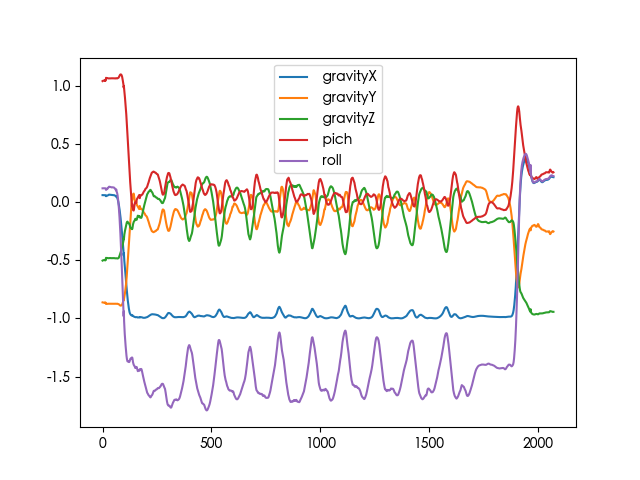

In [30]:
#读取数据
df = pd.read_csv(os.path.join(file_sub_path_pull_up,"GravityAndAttitude.csv"))
df.iloc[:,1:6].plot()

In [31]:
df.iloc[:,1:7].eplot()

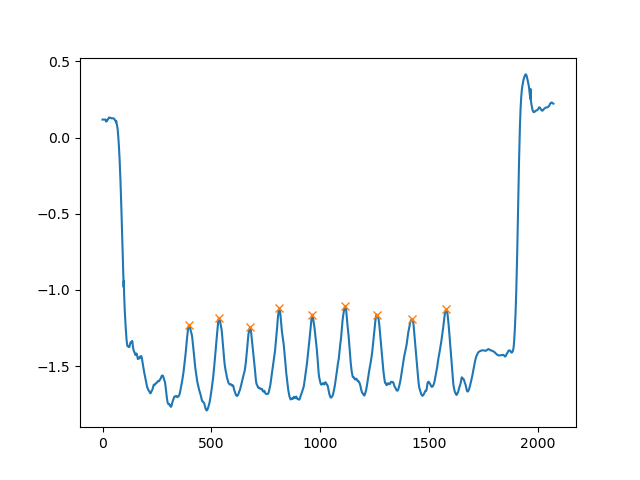

总计完成9次引体向上


In [7]:
#根据图表选择有效轴为陀螺仪的 roll
target_axis = df[" roll"]

#查找峰值
peaks, properties = find_peaks(target_axis,prominence=(0.3,1))
plt.close()
plt.plot(target_axis)
plt.plot(peaks, target_axis[peaks], "x")
plt.show()

count = len(peaks)
print("总计完成{}次引体向上".format(count))

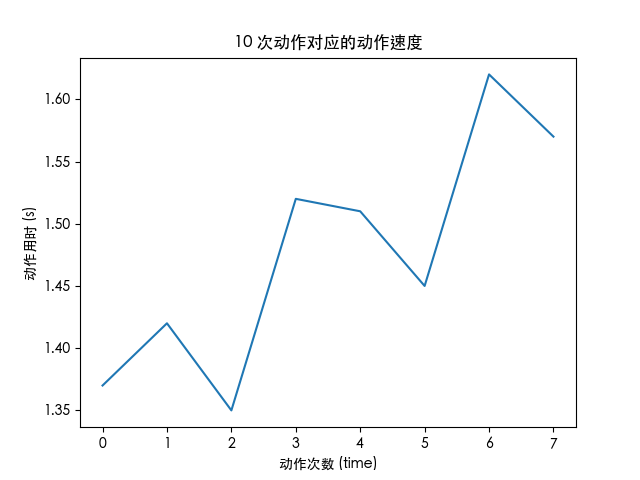

In [19]:
#每个动作用时
movemet_time = np.diff(peaks)/100 #苹果手表陀螺仪最大采样频率为 100 HZ

plt.close()
#显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(movemet_time)
plt.title("10 次动作对应的动作速度")
plt.xlabel("动作次数 (time)")
plt.ylabel("动作用时 (s)")
plt.show()